In [1]:
import pandas as pd
import os 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRFClassifier

from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

import shap
shap.initjs()

/home/yash/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
df=pd.read_csv("Dataset/Dataset.csv")
SampleSubmission=pd.read_csv("Dataset/sample_submission - Sheet1 (1).csv")

In [3]:
df.shape

(4119, 42)

In [4]:
SampleSubmission

,Variables,Mark
0,x_1,0
1,x_109,0
2,x_113,0
3,x_12,0
4,x_124,0
5,x_127,0
6,x_144,0
7,x_16,0
8,x_18,0
9,x_2,0


In [5]:
df.describe()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,...,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,2059.000000,5166.469289,0.563244,3.048798,503.509832,50.483855,-0.122845,3.609128,34.826657,960.422190,...,-0.032340,1050.474387,16.507405,256.788055,-0.133831,248.378733,0.000371,-0.006766,-0.037985,0.109493
std,1189.197208,73.588512,0.496044,2.544466,291.454491,28.862659,1.468947,1.825079,20.441569,191.922786,...,0.289226,408.389794,9.554037,254.703736,0.572124,145.247366,0.044075,0.156240,0.380439,0.312294
min,0.000000,4964.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,1.000000,0.000000,0.000000,...,-0.620000,49.000000,0.000000,0.000000,-0.310000,0.000000,-0.180000,-0.130000,-0.660000,0.000000
25%,1029.500000,5099.000000,0.000000,1.000000,250.000000,26.000000,-2.000000,1.000000,17.000000,999.000000,...,0.110000,766.500000,8.000000,103.000000,-0.310000,122.000000,0.020000,-0.100000,-0.490000,0.000000
50%,2059.000000,5191.000000,1.000000,5.000000,497.000000,50.000000,1.000000,5.000000,35.000000,999.000000,...,0.110000,1048.000000,16.000000,181.000000,-0.310000,249.000000,0.020000,-0.100000,0.070000,0.000000
75%,3088.500000,5228.000000,1.000000,6.000000,760.500000,76.000000,1.000000,5.000000,53.000000,999.000000,...,0.110000,1332.500000,25.000000,317.000000,-0.310000,374.000000,0.020000,0.240000,0.210000,0.000000
max,4118.000000,5228.000000,1.000000,6.000000,999.000000,100.000000,1.000000,5.000000,70.000000,999.000000,...,0.110000,2077.000000,33.000000,3643.000000,2.690000,500.000000,0.020000,0.390000,0.930000,1.000000


In [6]:
df.head(10)

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,0,5099,1,5,156,35,-2,1,40,999,...,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49,0
1,1,5191,0,1,164,16,1,5,4,999,...,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21,0
2,2,5228,1,0,774,75,1,5,12,999,...,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21,0
3,3,5228,1,1,747,4,1,5,69,999,...,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21,0
4,4,5196,1,5,29,28,0,4,32,999,...,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21,0
5,5,4964,0,0,709,93,-1,1,25,999,...,0.11,1616,2,128,0.35,370,0.02,0.24,-0.21,0
6,6,4964,1,6,524,44,-1,1,33,999,...,0.11,754,19,290,-0.31,5,0.02,0.24,0.21,0
7,7,5196,1,0,947,71,0,4,47,999,...,-0.62,527,32,44,-0.31,229,0.02,-0.10,-0.66,0
8,8,5196,1,5,289,24,0,4,51,999,...,0.11,603,4,68,0.35,365,0.02,-0.13,-0.21,0
9,9,5191,1,0,593,31,1,5,38,999,...,-0.62,781,12,170,-0.31,183,0.02,-0.10,-0.49,0


In [7]:
df.isnull()

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
print ("For the NaN values")

for columns in df:
    print(f"In the columns {columns} are there any NaN value :{df[columns].isna().any()}")

print ("Now for the null values")
for columns in df:
    print(f"In the columns {columns} are there any NaN value :{df[columns].isnull().any()}")

For the NaN values
In the columns Unnamed: 0 are there any NaN value :False
In the columns x_1 are there any NaN value :False
In the columns x_109 are there any NaN value :False
In the columns x_113 are there any NaN value :False
In the columns x_12 are there any NaN value :False
In the columns x_124 are there any NaN value :False
In the columns x_127 are there any NaN value :False
In the columns x_144 are there any NaN value :False
In the columns x_16 are there any NaN value :False
In the columns x_18 are there any NaN value :False
In the columns x_2 are there any NaN value :False
In the columns x_25 are there any NaN value :False
In the columns x_27 are there any NaN value :False
In the columns x_28 are there any NaN value :False
In the columns x_30 are there any NaN value :False
In the columns x_33 are there any NaN value :False
In the columns x_38 are there any NaN value :False
In the columns x_42 are there any NaN value :False
In the columns x_44 are there any NaN value :False
In 

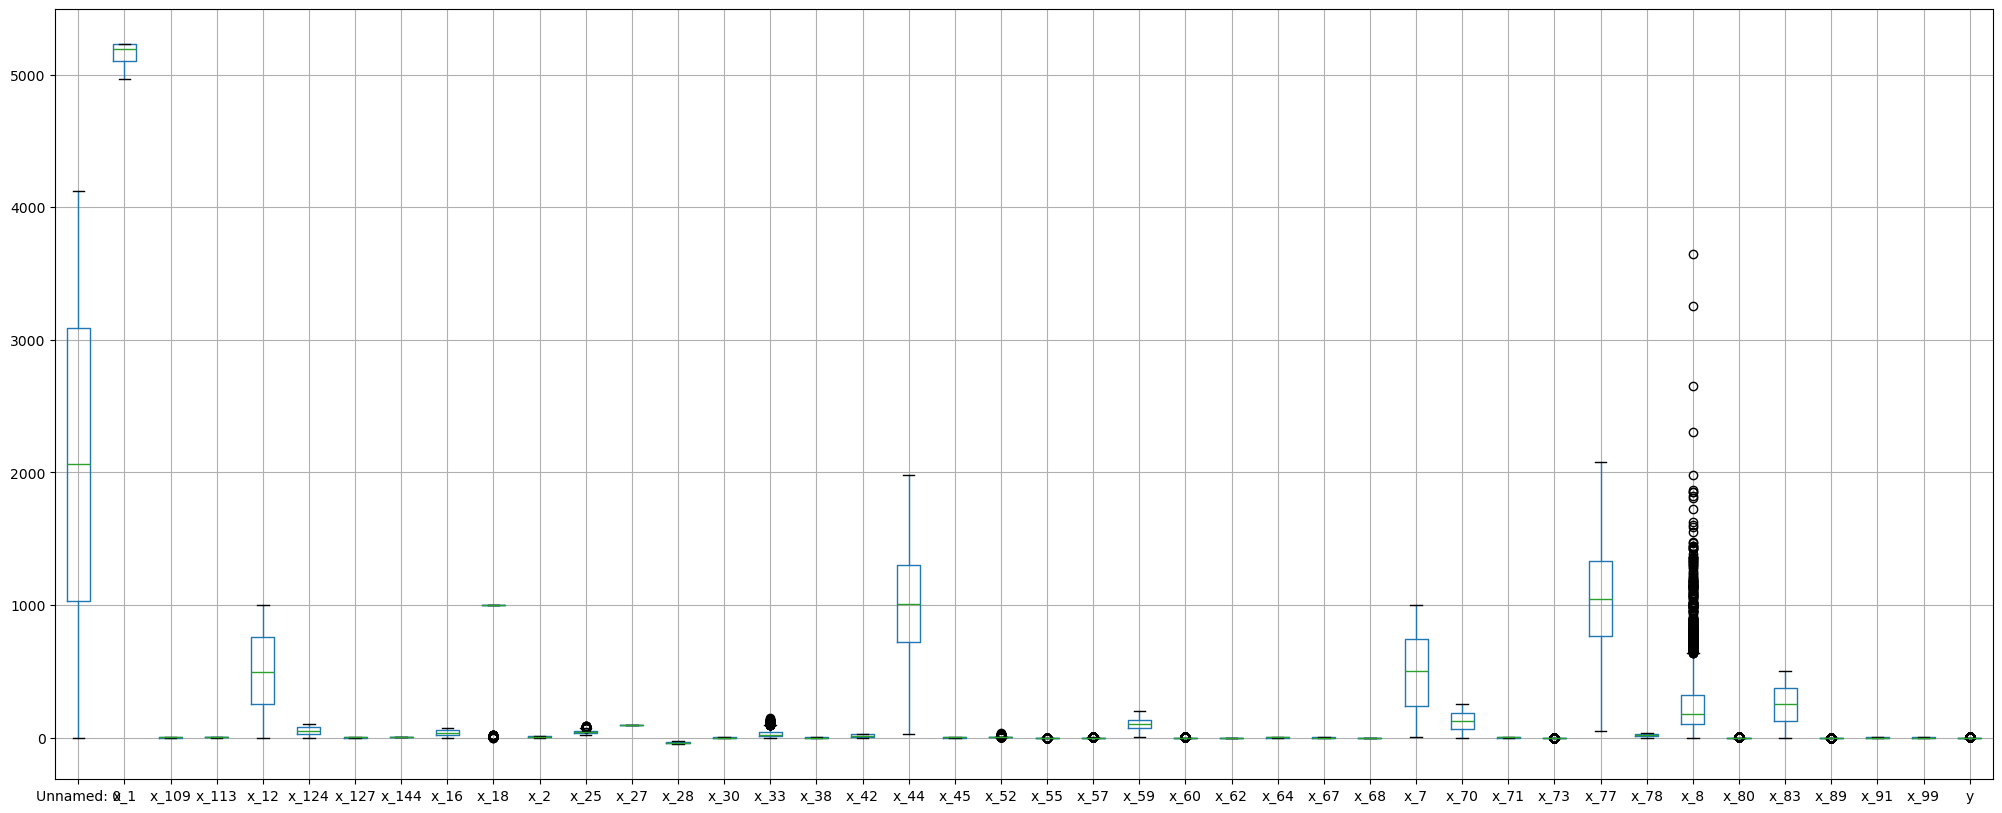

In [9]:
df.boxplot(figsize=(25,10))
plt.show()

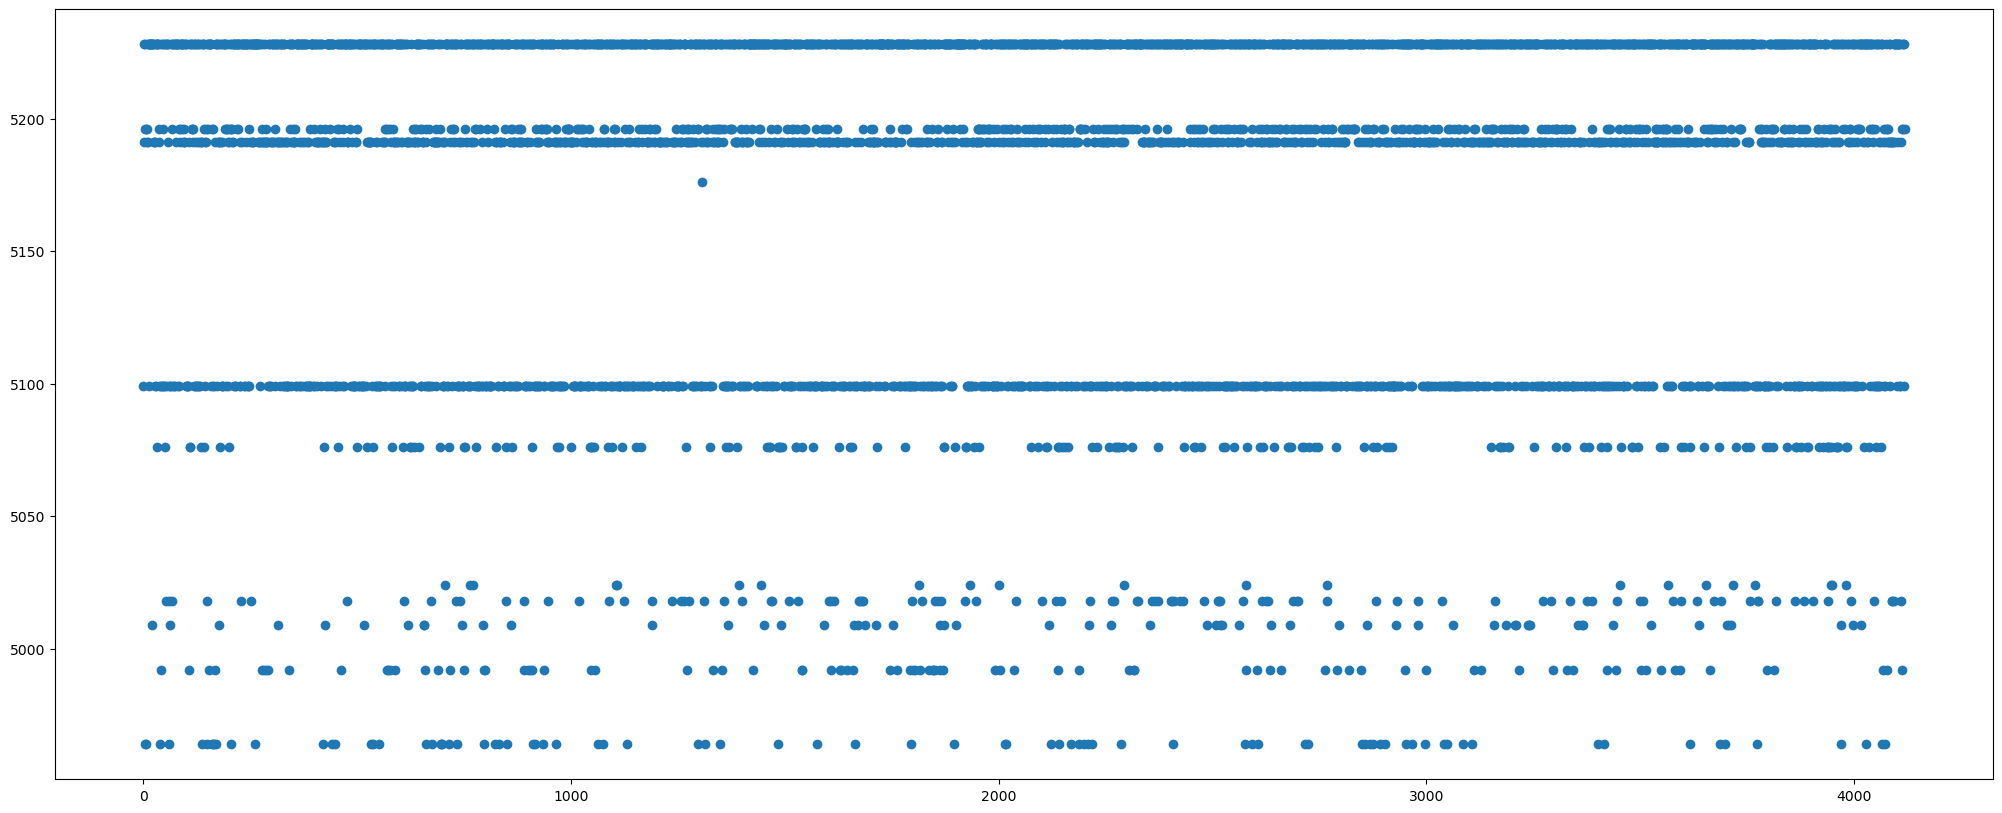

In [10]:
plt.figure(figsize=(25,10))
plt.scatter(df["Unnamed: 0"],df["x_1"])
plt.show()

In [11]:
XBG=XGBRFClassifier()
Cat=CatBoostClassifier()
LGB=LGBMClassifier()

In [12]:
labels=df["y"]

df.drop("y",axis=1,inplace=True)
df

,Unnamed: 0,x_1,x_109,x_113,x_12,x_124,x_127,x_144,x_16,x_18,...,x_71,x_73,x_77,x_78,x_8,x_80,x_83,x_89,x_91,x_99
0,0,5099,1,5,156,35,-2,1,40,999,...,1,0.11,629,14,487,-0.31,115,0.02,-0.10,-0.49
1,1,5191,0,1,164,16,1,5,4,999,...,0,0.11,509,26,346,-0.31,317,0.02,0.24,-0.21
2,2,5228,1,0,774,75,1,5,12,999,...,0,0.11,1058,30,227,-0.31,464,0.02,-0.10,-0.21
3,3,5228,1,1,747,4,1,5,69,999,...,1,0.11,1048,4,17,-0.31,39,-0.18,-0.10,-0.21
4,4,5196,1,5,29,28,0,4,32,999,...,0,0.11,993,22,58,-0.31,492,0.02,-0.10,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4114,5228,1,5,197,82,1,5,6,999,...,1,0.11,672,23,53,-0.31,474,-0.07,-0.10,0.21
4115,4115,5228,1,5,949,72,1,5,2,999,...,1,0.11,1058,6,219,-0.31,475,0.02,-0.10,0.21
4116,4116,5099,1,1,478,41,-2,1,25,999,...,0,0.11,1240,16,64,0.35,210,0.02,0.24,0.93
4117,4117,5228,1,0,554,36,1,5,68,999,...,0,0.11,1152,21,528,-0.31,49,0.02,-0.10,0.21


In [13]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(df,labels,test_size=0.2,shuffle=True)

In [14]:
XBG.fit(Xtrain,Ytrain)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [15]:
ypred=XBG.predict(Xtest)

In [16]:
acc=accuracy_score(Ytest,ypred)
print(acc)

0.9114077669902912


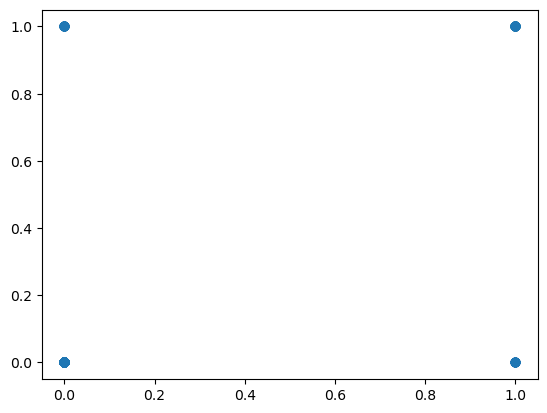

In [17]:
plt.scatter(Ytest,ypred)
plt.show()

In [18]:
print(Ytest[:3])
print(ypred[:3])

1666    0
307     0
3006    0
Name: y, dtype: int64
[0 0 0]


In [19]:
explainer=shap.Explainer(XBG)
shap_values=explainer(Xtrain)

[20:37:32] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [20]:
np.shape(shap_values.values)

(3295, 41)

In [23]:
shap.plots.force(shap_values[0])